## Problem Statement:
Challenge Overview:
Amidst the remarkable advancements in the financial industry, commercial banks are grappling with an emerging trend in financial threats related to the credit risk landscape. A critical concern in this scenario is the accurate prediction of credit default risk among clients. This challenge revolves around forecasting the likelihood of credit default based on the attributes of credit card owners and their payment histories.

Approach:
The proposed solution involves undertaking fundamental machine learning tasks such as Data Exploration, Data Cleaning, Feature Engineering, Model Building, and Model Testing. A diverse set of machine learning algorithms will be explored to identify the most effective approach for predicting credit default risk in this specific context.

Expected Outcomes:
Participants are tasked with developing a robust solution capable of predicting the probability of credit default by leveraging the characteristics of credit card owners and their payment histories. The ultimate goal is to furnish a predictive model that aligns seamlessly with the nuances of the problem at hand.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
# default payment (Yes = 1, No = 0)
# Column Information
# PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight - months, 9=payment delay for nine months and above)
# PAY_2: Repayment status in August, 2005 (scale same as above)
# PAY_3: Repayment status in July, 2005 (scale same as above)
# PAY_4: Repayment status in June, 2005 (scale same as above)
# PAY_5: Repayment status in May, 2005 (scale same as above)
# PAY_6: Repayment status in April, 2005 (scale same as above)
# BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
# BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
# BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
# BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
# BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
# BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
# PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
# PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
# PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
# PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
# PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
# PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

## EDA  and Data Cleaning

In [10]:
data = pd.read_excel('default of credit card clients.xls',header=1)

In [3]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
# no null value in data set
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
# No duplicet value in data set
data.duplicated().sum()

0

In [9]:
data.shape

(30000, 25)

In [11]:
# drop unwanted value from data
data.drop("ID",axis=1,inplace=True)

In [12]:
# saprate categorical columns and numerical colums
categorical_columns = data.select_dtypes(include="object").columns
numerical_columns = data.select_dtypes(exclude="object").columns
print(categorical_columns)
print(numerical_columns)

Index([], dtype='object')
Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


There is no categorical columns

In [13]:
# fetch the unique value of catigorical features
for i in numerical_columns:
    print(i,data[i].unique())
    print("*"*100)

LIMIT_BAL [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
****************************************************************************************************
SEX [2 1]
****************************************************************************************************
EDUCATION [2 1 3 5 4 6 0]
**********************************************************************************************

In [14]:
# change column name for better understanding
data["Default"] = data["default payment next month"]
data.drop("default payment next month",axis=1,inplace=True)

In [15]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
# saprate categorical columns and numerical colums
categorical_columns = data.select_dtypes(include="object").columns
numerical_columns = data.select_dtypes(exclude="object").columns
print(categorical_columns)
print(numerical_columns)

Index([], dtype='object')
Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')


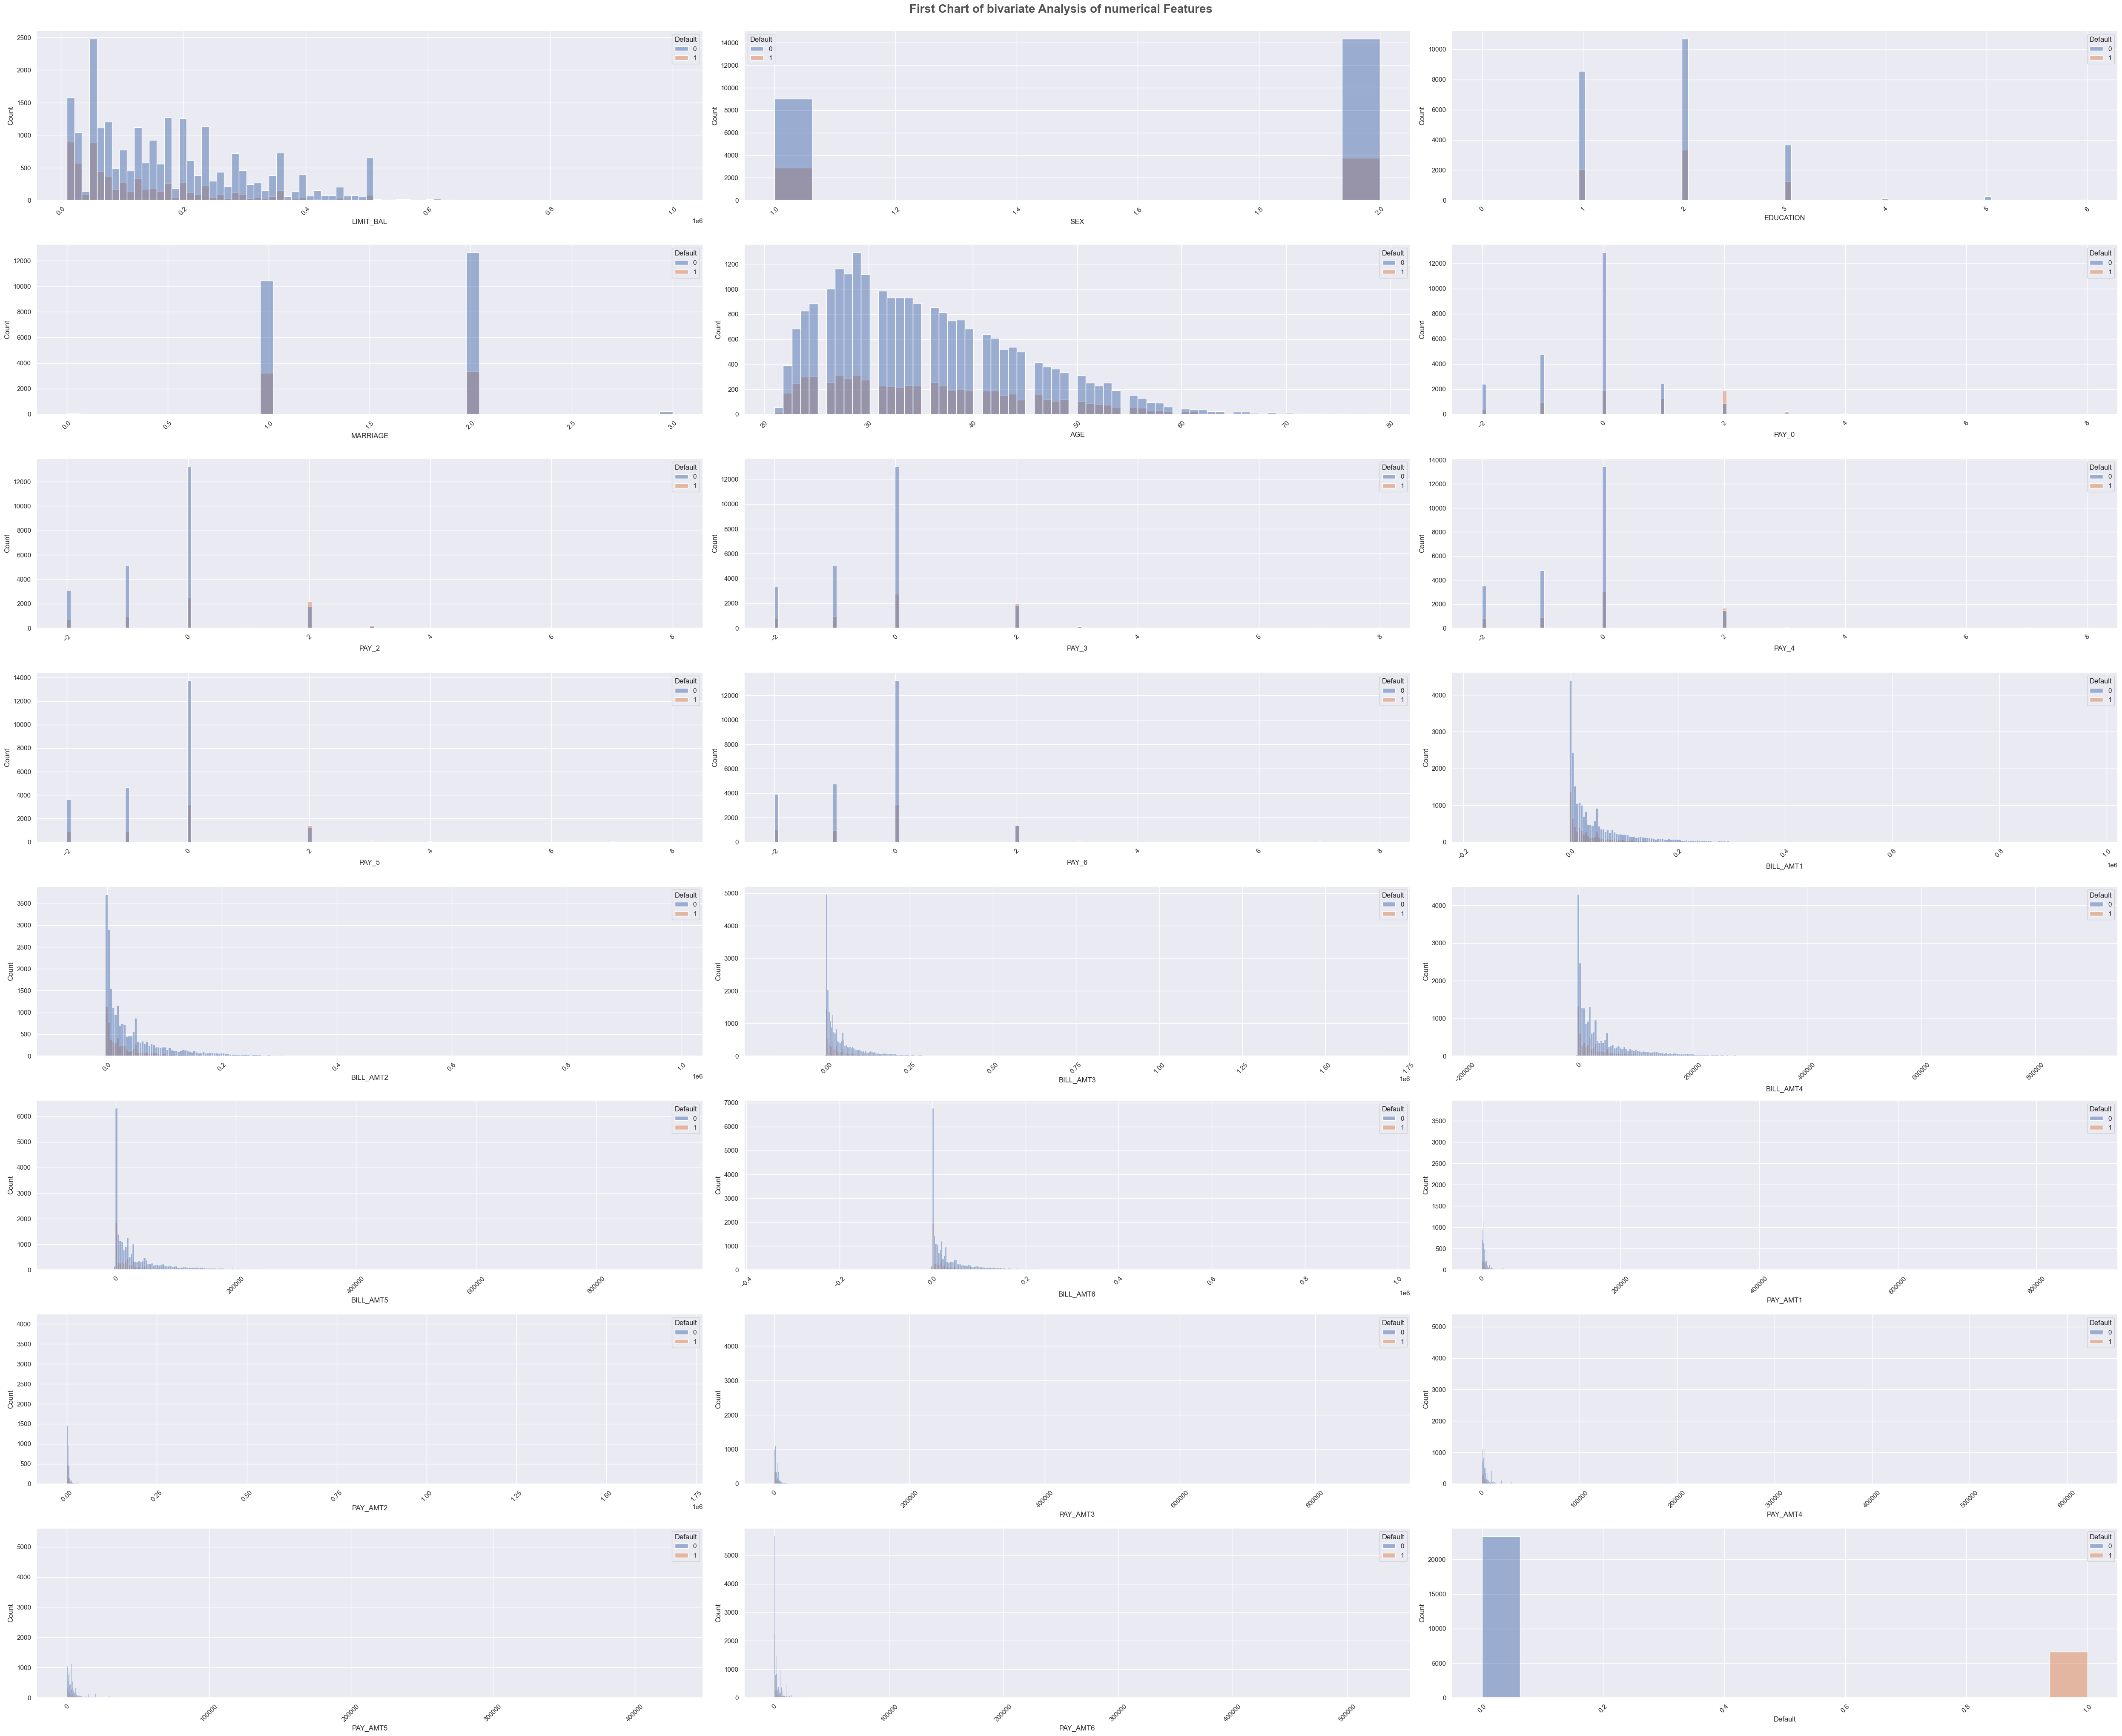

In [22]:
# plot for categorical columns
plt.figure(figsize=(50, 50))
plt.suptitle('First Chart of bivariate Analysis of numerical Features', fontsize=20, fontweight='bold', alpha=0.8,y=1)
for i in range(0, len(numerical_columns)):
    plt.subplot(10, 3, i+1)
    sns.histplot(data = data, x = data[numerical_columns[i]], hue = "Default");
    plt.xlabel(numerical_columns[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

observation NOT Default are more then DEFAUT


<Axes: ylabel='count'>

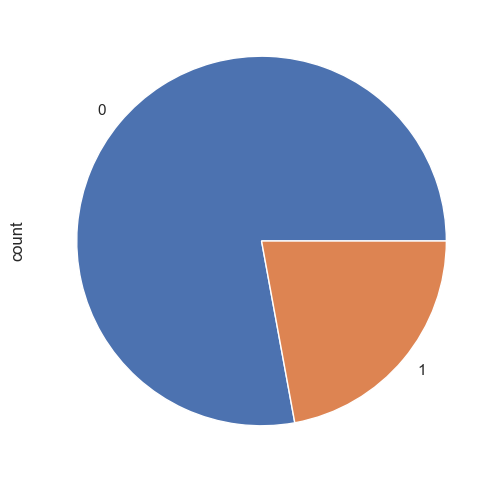

In [23]:
print("observation NOT Default are more then DEFAUT")
data["Default"].value_counts().plot.pie()

In [24]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [25]:
data.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',"LIMIT_BAL",'MARRIAGE'],axis=1,inplace=True)

<Axes: >

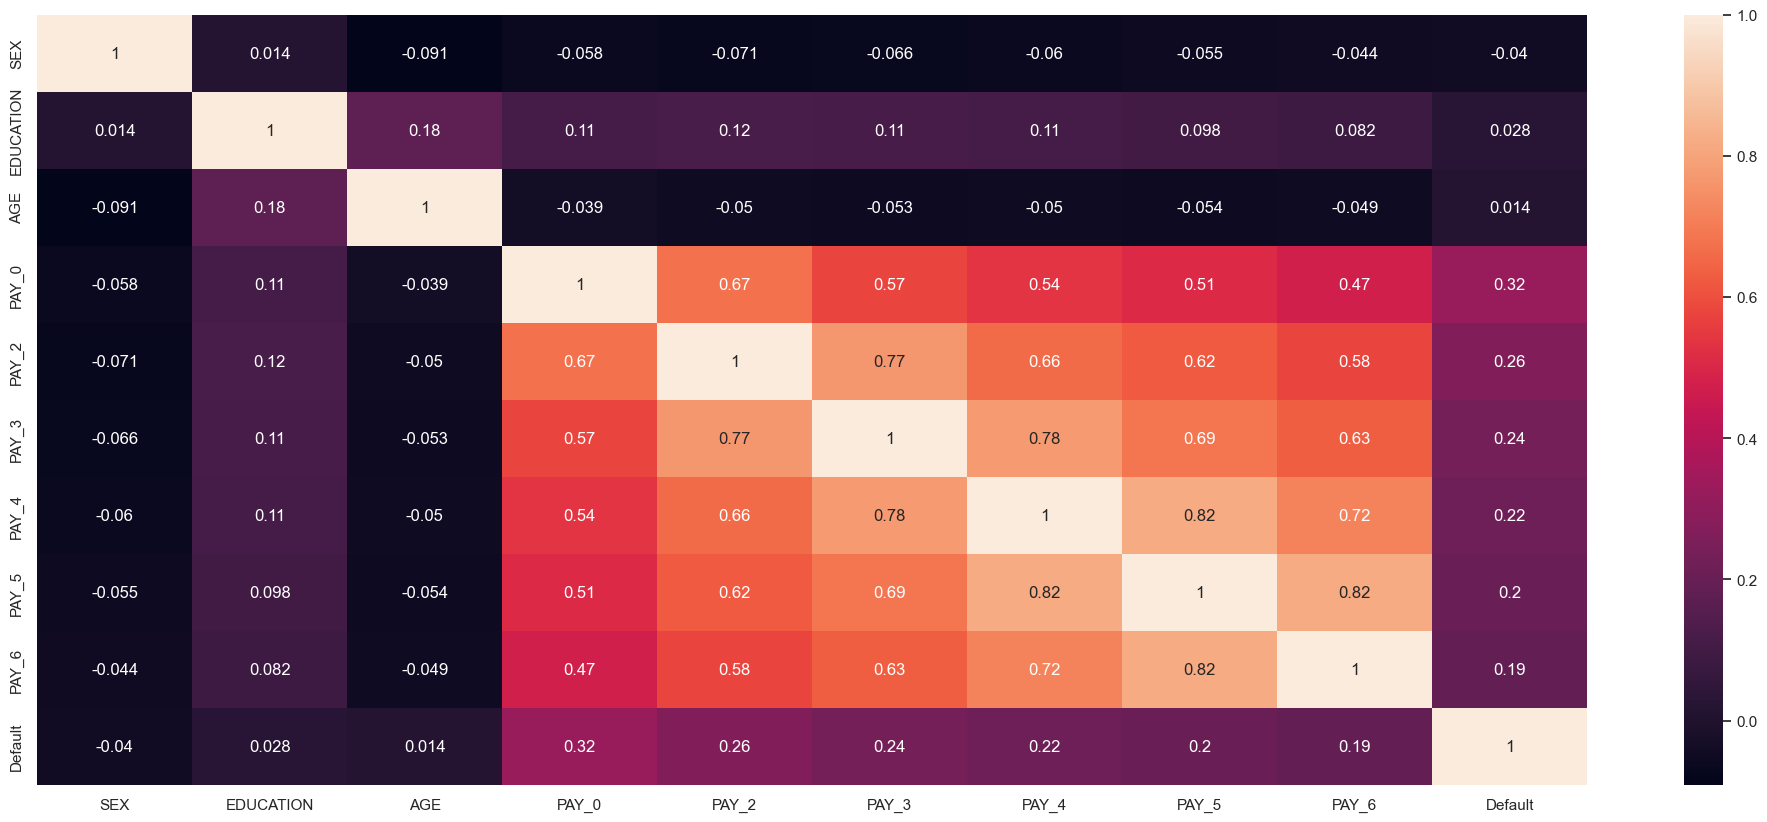

In [26]:
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(),annot=True)

In [27]:
x = data.drop('Default',axis=1)
y = data['Default']

In [28]:
numerical_columns = x.select_dtypes(exclude="object").columns
print(numerical_columns)

Index(['SEX', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6'],
      dtype='object')


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [30]:
## numerical pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

# get Preprocessor obj
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_columns)
])



In [31]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())
X_train.head()

,num_pipline__SEX,num_pipline__EDUCATION,num_pipline__AGE,num_pipline__PAY_0,num_pipline__PAY_2,num_pipline__PAY_3,num_pipline__PAY_4,num_pipline__PAY_5,num_pipline__PAY_6
0,-1.235119,-1.07566,0.712073,-0.875413,-0.722920,-0.694365,-0.663290,-0.644433,-0.614631
1,-1.235119,0.18642,0.385057,0.903655,1.792436,0.142009,0.192430,0.238050,0.251657
2,0.809639,0.18642,-0.595992,0.014121,0.115532,0.142009,1.903871,2.003014,1.984232
3,-1.235119,0.18642,0.167046,3.572258,2.630887,1.814759,-0.663290,0.238050,0.251657
4,0.809639,-1.07566,-0.595992,0.014121,0.115532,0.142009,0.192430,0.238050,0.251657


In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24000, 9)
(24000,)
(6000, 9)
(6000,)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report,ConfusionMatrixDisplay

In [34]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    pre = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    return confusionmetrix,pre,recall,f1score,accuracyscore
    

In [35]:
logistic = LogisticRegression(class_weight="balanced")

In [36]:
logistic.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [37]:
y_predict = logistic.predict(X_test)

In [33]:
y_predict

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
logistic.score(X_train,y_train)

0.747

In [39]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[3743  975]
 [ 547  735]]
PRECISION_SCORE: 0.4298245614035088
RECALL_SCORE: 0.5733229329173167
F1_SCORE: 0.49131016042780756
ACCURACY_SCORE: 0.7463333333333333


(None, None, None, None, None)

In [40]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      4718
           1       0.43      0.57      0.49      1282

    accuracy                           0.75      6000
   macro avg       0.65      0.68      0.66      6000
weighted avg       0.78      0.75      0.76      6000



## Decision Tree

In [41]:
DecisionTree = DecisionTreeClassifier(class_weight="balanced")

In [42]:
DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [43]:
DecisionTree.score(X_train,y_train)

0.8750416666666667

In [44]:
y_predict = DecisionTree.predict(X_test)

In [45]:
print(accuracy_score(y_test,y_predict))

0.7176666666666667


In [46]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      4718
           1       0.37      0.44      0.40      1282

    accuracy                           0.72      6000
   macro avg       0.60      0.62      0.61      6000
weighted avg       0.74      0.72      0.73      6000



## RandomForest

In [47]:
RandomForest = RandomForestClassifier(class_weight="balanced")

In [48]:
RandomForest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [49]:
RandomForest.score(X_train,y_train)

0.890875

In [50]:
y_predict = RandomForest.predict(X_test)

In [51]:
print(accuracy_score(y_test,y_predict))

0.7678333333333334


In [52]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4718
           1       0.45      0.41      0.43      1282

    accuracy                           0.77      6000
   macro avg       0.65      0.64      0.64      6000
weighted avg       0.76      0.77      0.76      6000



## Hyperparameter Tuening

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
# Logastic Regresion using Hyperparameter Tuening
logestic = LogisticRegression()
params = {
    "penalty":["l1", "l2", "elasticnet", None],
    "class_weight":["balanced"],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

In [55]:
grid = GridSearchCV(estimator=logestic,param_grid=params,cv=5)

In [56]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [57]:
grid.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}

In [58]:
grid.score(X_train,y_train)

0.779875

In [59]:
y_predict = grid.predict(X_test)

In [60]:
print(accuracy_score(y_test,y_predict))

0.781


In [61]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4718
           1       0.49      0.52      0.51      1282

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.68      6000
weighted avg       0.79      0.78      0.78      6000



In [62]:
#DicisionTree Using Hyperparameter Tuening
DecisionTree_tuned = DecisionTreeClassifier()
params = {
    "class_weight":["balanced"],
    "criterion":["gini", "entropy", "log_loss"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6,10],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto","sqrt","log2"]
}

In [63]:
grid = GridSearchCV(estimator=DecisionTree_tuned,param_grid=params,cv=3)

In [64]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [65]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'random'}

In [66]:
grid.score(X_train,y_train)

0.7956666666666666

In [67]:
y_predict = grid.predict(X_test)

In [68]:
print(accuracy_score(y_test,y_predict))

0.7935


In [69]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4718
           1       0.52      0.38      0.44      1282

    accuracy                           0.79      6000
   macro avg       0.68      0.64      0.66      6000
weighted avg       0.78      0.79      0.78      6000



In [70]:
## RandomForest with Hyperparameter Tuening
RandomForest_tuned = RandomForestClassifier()
params = {
    "class_weight":["balanced"],
    "n_estimators":[150,200],
    'max_depth': [10, 8, 5,20],
    'min_samples_split': [2, 5, 10],
}

In [71]:
grid = GridSearchCV(estimator=RandomForest_tuned,param_grid=params,cv=3)

In [72]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [10, 8, 5, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [150, 200]})

In [73]:
grid.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 200}

In [74]:
grid.score(X_train,y_train)

0.8184583333333333

In [75]:
y_predict = grid.predict(X_test)

In [76]:
print(accuracy_score(y_test,y_predict))

0.7883333333333333


In [77]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4718
           1       0.50      0.54      0.52      1282

    accuracy                           0.79      6000
   macro avg       0.69      0.70      0.69      6000
weighted avg       0.79      0.79      0.79      6000



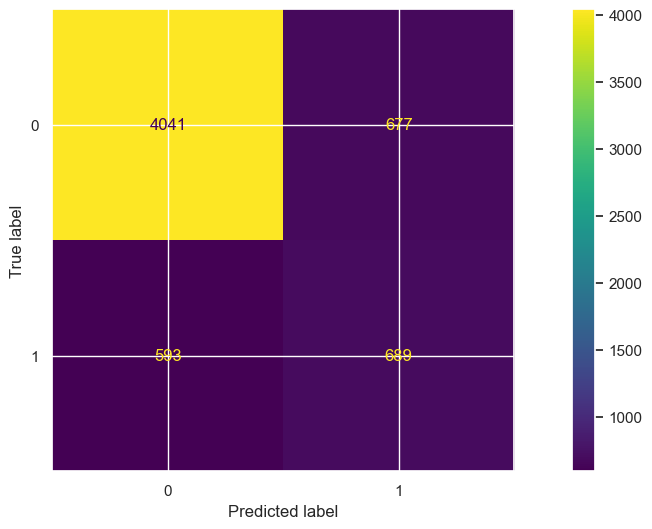

In [78]:
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [97]:
import pickle 

# Save the trained model as a pickle string. 
pickle.dump(grid, open('CreditCard_Defaulter_model.pkl', "wb"))